In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import to_numeric

In [19]:
data = pd.read_csv("../lab2/Pokemon.csv",encoding="Windows-1252")

In [20]:
##删除多余的行和列
data.drop(columns="#", inplace=True)
data.drop(index=[808, 809], inplace=True)

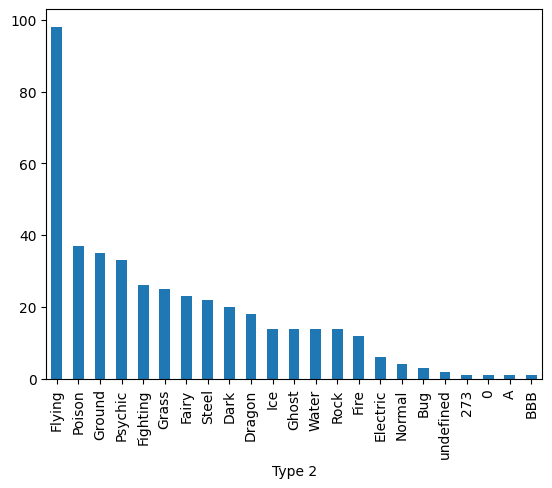

In [21]:
#去除type2列的异常值
data['Type 2'].value_counts().plot(kind='bar')
drop_types = ['Bug', 'A', '273', '0', 'BBB']
for type in drop_types:
    index = data[data["Type 2"] == type].index
    data.drop(index=index, inplace=True)


In [22]:
data.drop_duplicates(inplace=True)
print(data)

                      Name     Type 1     Type 2      Total         HP  \
0                Bulbasaur      Grass     Poison        318         45   
1                  Ivysaur      Grass     Poison        405         60   
2                 Venusaur      Grass     Poison        525         80   
3    VenusaurMega Venusaur      Grass     Poison        625         80   
4               Charmander       Fire        NaN        309         39   
..                     ...        ...        ...        ...        ...   
802    DiancieMega Diancie       Rock      Fairy        700         50   
803    HoopaHoopa Confined    Psychic      Ghost        600         80   
804     HoopaHoopa Unbound    Psychic       Dark        680         80   
805              Volcanion       Fire      Water        600         80   
806              undefined  undefined  undefined  undefined  undefined   

        Attack    Defense    Sp. Atk    Sp. Def      Speed Generation  \
0           49         49         65  

In [23]:
#将Generation列和Legendary列进行一个向前填充
data["Generation"] = data["Generation"].fillna(method="ffill")
data["Legendary"] = data["Legendary"].fillna(method="ffill")
print(data)


                      Name     Type 1     Type 2      Total         HP  \
0                Bulbasaur      Grass     Poison        318         45   
1                  Ivysaur      Grass     Poison        405         60   
2                 Venusaur      Grass     Poison        525         80   
3    VenusaurMega Venusaur      Grass     Poison        625         80   
4               Charmander       Fire        NaN        309         39   
..                     ...        ...        ...        ...        ...   
802    DiancieMega Diancie       Rock      Fairy        700         50   
803    HoopaHoopa Confined    Psychic      Ghost        600         80   
804     HoopaHoopa Unbound    Psychic       Dark        680         80   
805              Volcanion       Fire      Water        600         80   
806              undefined  undefined  undefined  undefined  undefined   

        Attack    Defense    Sp. Atk    Sp. Def      Speed Generation  \
0           49         49         65  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7888\3463149891.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Generation"] = data["Generation"].fillna(method="ffill")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7888\3463149891.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Legendary"] = data["Legendary"].fillna(method="ffill")


In [24]:
nums = ["1", "2","3","4","5","6","7","8","9"]

data = data.reset_index(drop=True)

#将generation列和Legendary列的异常值修改
for index, value in data["Generation"].items():
    if value not in nums:
        #print(index, value)
        data.at[index, "Generation"] = data.at[index-1, "Generation"]

bools = ["TRUE", "FALSE"]
for index, value in data["Legendary"].items():
    if value not in bools:
        #print(index, value)
        data.at[index, "Legendary"] = data.at[index-1, "Legendary"]
print(data)

                      Name     Type 1     Type 2      Total         HP  \
0                Bulbasaur      Grass     Poison        318         45   
1                  Ivysaur      Grass     Poison        405         60   
2                 Venusaur      Grass     Poison        525         80   
3    VenusaurMega Venusaur      Grass     Poison        625         80   
4               Charmander       Fire        NaN        309         39   
..                     ...        ...        ...        ...        ...   
790    DiancieMega Diancie       Rock      Fairy        700         50   
791    HoopaHoopa Confined    Psychic      Ghost        600         80   
792     HoopaHoopa Unbound    Psychic       Dark        680         80   
793              Volcanion       Fire      Water        600         80   
794              undefined  undefined  undefined  undefined  undefined   

        Attack    Defense    Sp. Atk    Sp. Def      Speed Generation  \
0           49         49         65  

In [25]:
#将列的数据类型修正
to_numeric_columns = ['Total', 'HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed','Defense', 'Generation']
data.drop(index=794,inplace=True)
for col in to_numeric_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

In [26]:
#填充缺失值
data.dropna(subset=["Name"], inplace=True)
data["HP"] = data["HP"].fillna(data['HP'].mean())
data["Type 2"] = data["Type 2"].fillna(method="ffill")
print(data)

                      Name   Type 1  Type 2  Total    HP  Attack  Defense  \
0                Bulbasaur    Grass  Poison  318.0  45.0    49.0     49.0   
1                  Ivysaur    Grass  Poison  405.0  60.0    62.0     63.0   
2                 Venusaur    Grass  Poison  525.0  80.0    82.0     83.0   
3    VenusaurMega Venusaur    Grass  Poison  625.0  80.0   100.0    123.0   
4               Charmander     Fire  Poison  309.0  39.0    52.0     43.0   
..                     ...      ...     ...    ...   ...     ...      ...   
789                Diancie     Rock   Fairy  600.0  50.0   100.0    150.0   
790    DiancieMega Diancie     Rock   Fairy  700.0  50.0   160.0    110.0   
791    HoopaHoopa Confined  Psychic   Ghost  600.0  80.0   110.0     60.0   
792     HoopaHoopa Unbound  Psychic    Dark  680.0  80.0   160.0     60.0   
793              Volcanion     Fire   Water  600.0  80.0   110.0    120.0   

     Sp. Atk  Sp. Def  Speed  Generation Legendary  
0       65.0     65.0 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7888\1972081667.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Type 2"] = data["Type 2"].fillna(method="ffill")
